In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv(r'/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
len(df)

7043

#**Understanding the Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
pd.options.display.float_format = '{:,.3f}'.format
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,"7,043.000","7,043.000","7,043.000"
mean,0.162,32.371,64.762
std,0.369,24.559,30.090
min,0.000,0.000,18.250
25%,0.000,9.000,35.500
50%,0.000,29.000,70.350
75%,0.000,55.000,89.850
max,1.000,72.000,118.750


In [ ]:
len(df.columns)

21

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
for col in df.columns:
    print( col,':', df[col].nunique() )
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

customerID : 7043
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
Name: customerID, dtype: int64

********************

gender : 2
Male      3555
Female    3488
Name: gender, dtype: int64

********************

SeniorCitizen : 2
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

********************

Partner : 2
No     3641
Yes    3402
Name: Partner, dtype: int64

********************

Dependents : 2
No     4933
Yes    2110
Name: Dependents, dtype: int64

********************

tenure : 73
1     613
72    362
2     238
3     200
4     176
Name: tenure, dtype: int64

********************

PhoneService : 2
Yes    6361
No      682
Name: PhoneService, dtype: int64

********************

MultipleLines : 3
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

********************

InternetService : 3
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

******

In [ ]:
df.rename(columns = {'CustomerLeft': 'Churn'}, inplace = True)

# **Data Exploratory**
In this part we explore our data using questions and plots to understand the data further more/


## 1-What is the nature of customer demographic data?
gender, age ,partner , and dependent status

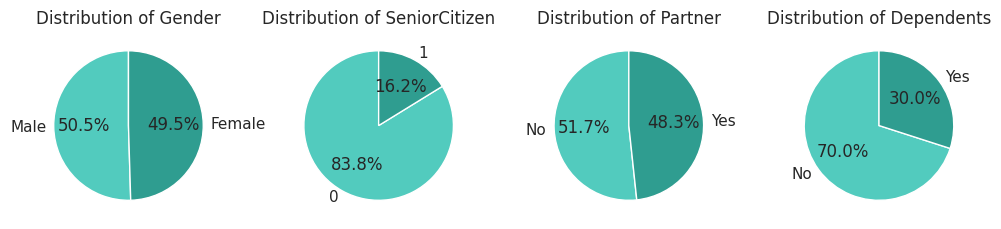

In [ ]:
# Define the categories and corresponding columns
categories = ["Gender", "SeniorCitizen", "Partner", "Dependents"]
columns = ["gender", "SeniorCitizen", "Partner", "Dependents"]

# Create subplots for each category
fig, axes = plt.subplots(1, 4, figsize=(10, 10))

# Iterate over categories and plot pie charts
for ax, category, column in zip(axes.flatten(), categories, columns):
    # Count the number of customers in each category
    counts = df[column].value_counts()
    colors = ["#52CBBE", "#2F9D90"]
    # Create a pie chart with a white border
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'},colors=colors)

    # Set title for each subplot
    ax.set_title(f"Distribution of {category}")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Gender Distribution ---- About half of the customers in our data set are male while the other half are female \
% Senior Citizens ---- Most of our customers in the data are younger people.There are only 16% of the customers who are senior citizens.   \
Partner ---- About 50% of the customers have a partner \
dependent status ---- only 30% of the total customers have dependents.

##2-What is the most common tenure during which the customer remains committed to the contract with the company?

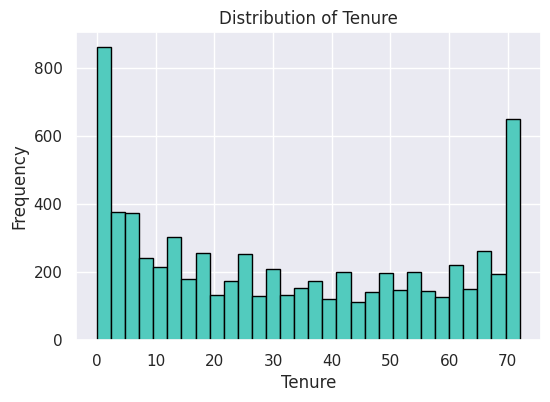

In [ ]:
# Create a histogram of the tenure
plt.figure(figsize=(6, 4))
plt.hist(df["tenure"], bins=30, edgecolor='black',color='#52CBBE')2
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.title("Distribution of Tenure")
plt.show()

When we look at the histogram, we see that there are a lot of customerss that have just been with the telephone company for a month or less.\
Conversely, there is also a notable cluster of customers who have a tenure of approximately 72 months.

##3-Have all customers terminated their contracts (churn) with the telecomunication company they deal with?

Text(0.5, 1.0, 'Distribution of CustomerLeft')

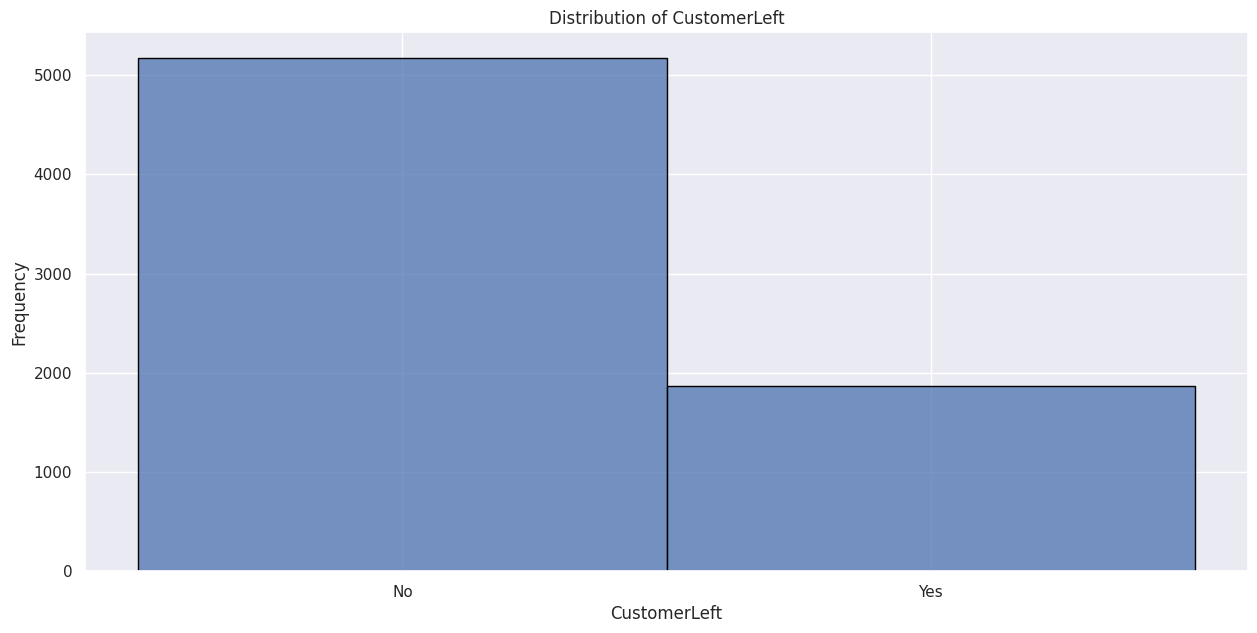

In [ ]:
plt.figure(figsize=(15, 7))

sns.histplot(df.Churn, bins=30, edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('CustomerLeft')
plt.title('Distribution of CustomerLeft')

More than half of the customers remain committed to their company

## 4-What type of contracts are most preferred among customers?

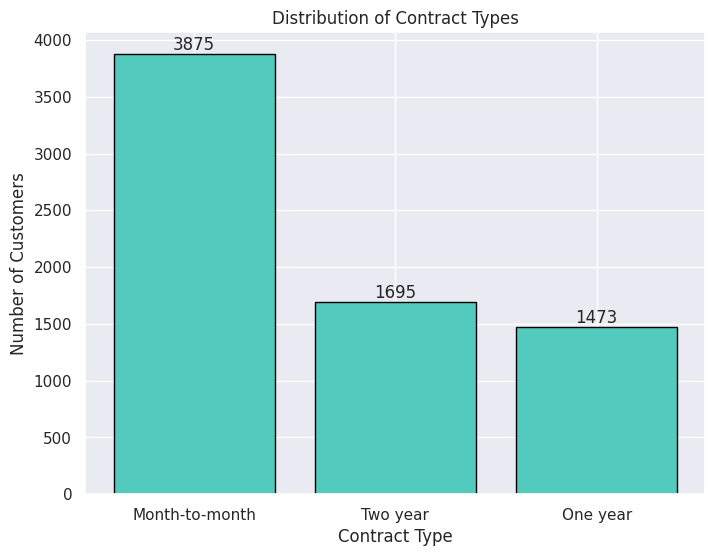

In [ ]:
# Count the number of customers for each contract type
contract_counts = df['Contract'].value_counts()

# Create a color map for different contract types

# Create a bar plot of the contract distribution
plt.figure(figsize=(8, 6))
bars = plt.bar(contract_counts.index, contract_counts.values, edgecolor='black',color='#52CBBE')

# Add data values to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.title('Distribution of Contract Types')
plt.show()

Most customers prefer Month-to-month contract

## 5-Does the type of contract affect the tenure of customer departure and the extent of their commitment?

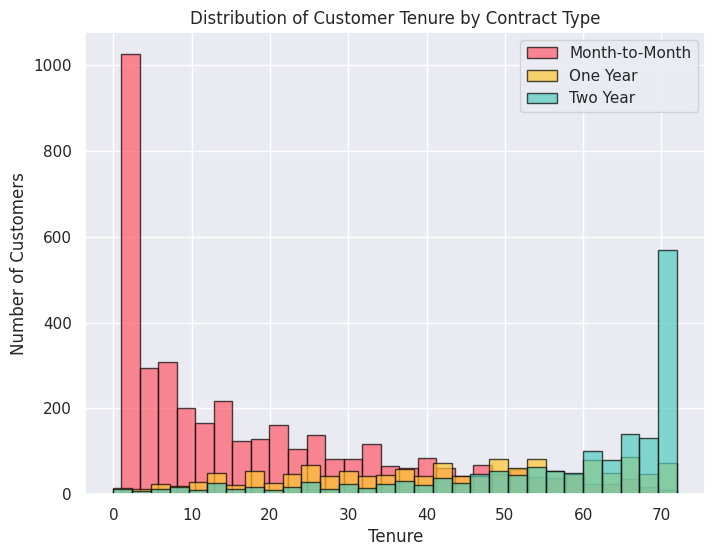

In [ ]:
# Filter data for each contract type
month_to_month = df[df['Contract'] == 'Month-to-month']['tenure']
one_year = df[df['Contract'] == 'One year']['tenure']
two_year = df[df['Contract'] == 'Two year']['tenure']

# Set up histogram plot
plt.figure(figsize=(8, 6))
plt.hist(month_to_month, bins=30, alpha=0.7, label='Month-to-Month', edgecolor='black',color="#FF5969")
plt.hist(one_year, bins=30, alpha=0.7, label='One Year', edgecolor='black',color="#FEC630")
plt.hist(two_year, bins=30, alpha=0.7, label='Two Year', edgecolor='black',color="#52CBBE")

# Customize plot
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Tenure by Contract Type')
plt.legend()

# Show the plot
plt.show()

The bulk of monthly contract customers typically stay with the company for only one to two months, whereas those with two-year contracts have a substantially longer tenure of about 70 months. This shows that clients who choose longer contract terms are more devoted to the company and more likely to stick around for a while.So, there is a relation between CotractType and Tenure

##6- does the partner culomn effect the churn?





<Axes: xlabel='Partner', ylabel='Yes'>

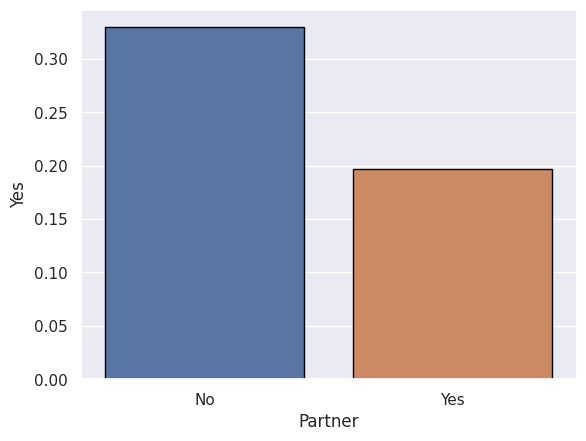

In [ ]:
grouped = df.groupby('Partner')['Churn'].value_counts(normalize=True).unstack()
sns.barplot(x='Partner', y='Yes', data=grouped.reset_index(), edgecolor='black')

## 7- does the Dependents culomn effect the churn?

<Axes: xlabel='Dependents', ylabel='Yes'>

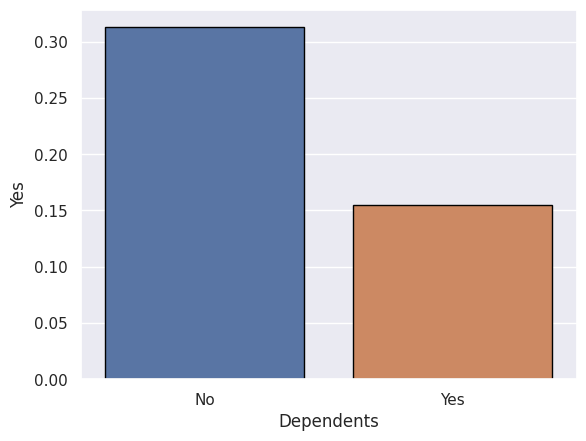

In [ ]:
grouped = df.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack()
sns.barplot(x='Dependents', y='Yes', data=grouped.reset_index(), edgecolor='black')

## 8- does the Senior Citizen culomn effect the churn?

<Axes: xlabel='SeniorCitizen', ylabel='Yes'>

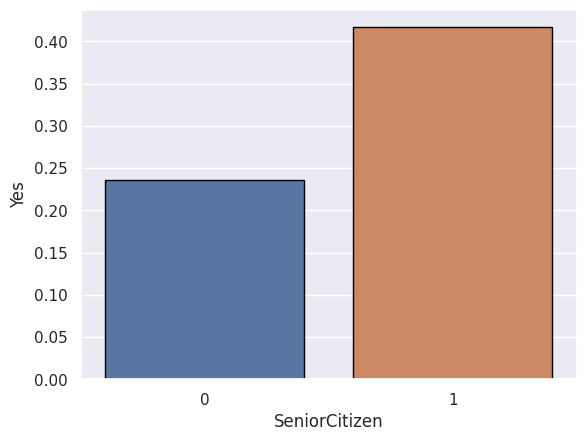

In [ ]:
grouped = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()
sns.barplot(x='SeniorCitizen', y='Yes', data=grouped.reset_index(), edgecolor='black')

## 9-Does the churn increases as the total charges increases?

---



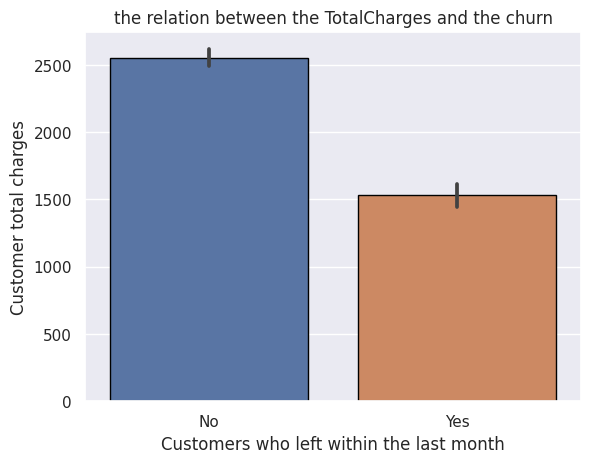

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
sns.barplot(data=df, x="Churn", y="TotalCharges", edgecolor='black')
plt.xlabel('Customers who left within the last month')
plt.ylabel('Customer total charges')
plt.title('the relation between the TotalCharges and the churn');

## 10-What is the relationship between paymenteMethod and churn

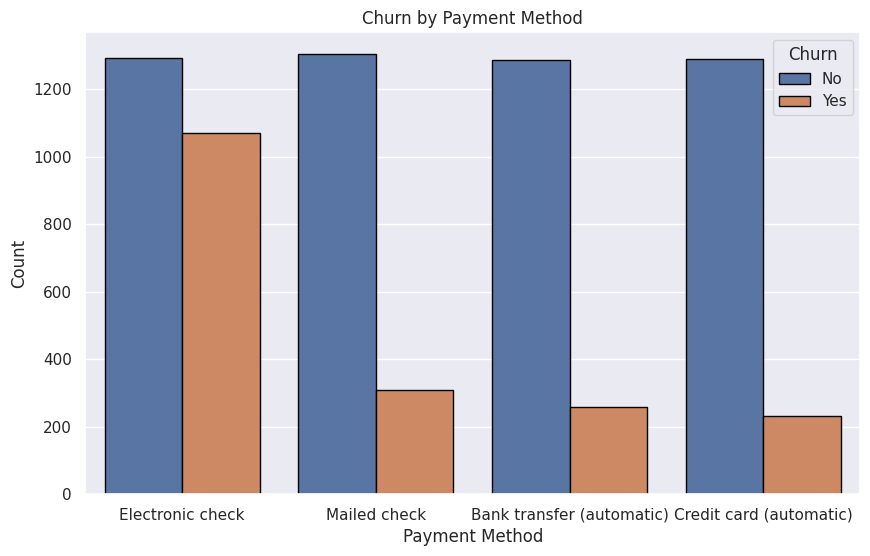

In [ ]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Create a bar plot of PaymentMethod and Churn
sns.countplot(x='PaymentMethod', hue='Churn', data=df, edgecolor='black')

# Add title and axis labels
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')

# Show the plot
plt.show()

## 11-What is the most preferred customer's  service provider?

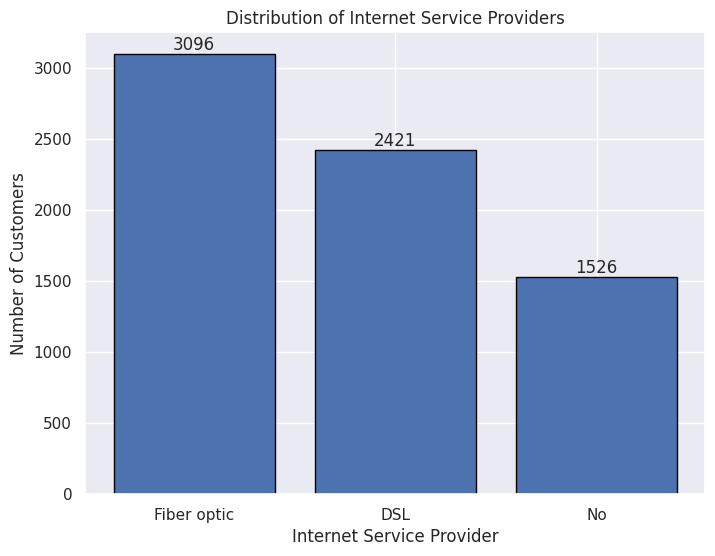

In [ ]:
# Count the number of customers by internet service provider
internet_counts = df["InternetService"].value_counts()

# Create a bar plot of the internet service provider distribution
plt.figure(figsize=(8, 6))
plt.bar(internet_counts.index, internet_counts.values, edgecolor='black')
plt.xlabel("Internet Service Provider")
plt.ylabel("Number of Customers")
plt.title("Distribution of Internet Service Providers")

# Add the data values on top of each bar
for i, count in enumerate(internet_counts.values):
    plt.text(i, count, str(count), ha="center", va="bottom")

plt.show()

## 12-How many customers who doesn't have steaming TV and left in the last month?

In [ ]:
filtered_df = df[(df['StreamingTV'] == 'No') & (df['Churn'] == 'Yes') ]

# Count the number of rows in the filtered dataset
count = len(filtered_df)

# Print the result
print(f"Number of customers who do not have streaming TV and left in the last month: {count}")

Number of customers who do not have streaming TV and left in the last month: 942


## 13-Does the customer's gender affect the duration of the contract with the company?

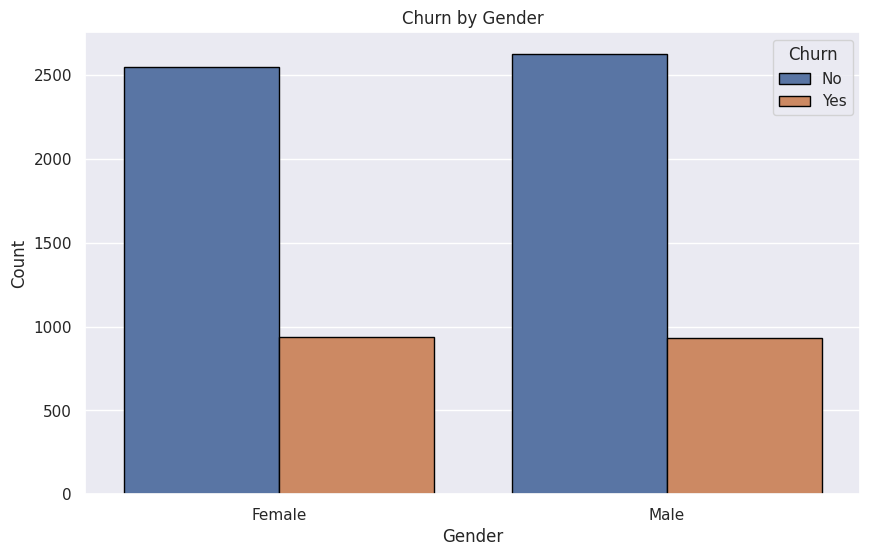

In [ ]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Create a bar plot of PaymentMethod and Churn
sns.countplot(x='gender', hue='Churn', data=df, edgecolor='black')

# Add title and axis labels
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

## 14-Does lower total charges mean lower churn?

<ipython-input-25-b06a61fdc879>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
<ipython-input-25-b06a61fdc879>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],


Text(0.5, 1.0, 'Distribution of total charges by churn')

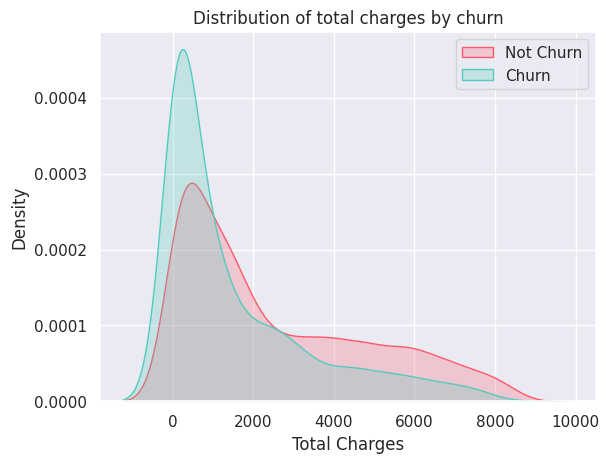

In [ ]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="#FF5969", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="#52CBBE", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

##15-How many customers stay for just one month?

In [ ]:
filtered_df = df[(df['tenure'] == 1) & (df['Churn'] == 'Yes') ]

# Count the number of rows in the filtered dataset
count = len(filtered_df)

# Print the result
print(f"Number of customers who stay for just one month: {count}")

Number of customers who stay for just one month: 380


##16-What is the average tenure a customer stays with the company

In [ ]:
# Calculate the average tenure
average_tenure = df['tenure'].mean()
print("Average Tenure:", average_tenure)

Average Tenure: 32.37114865824223


#Data Cleaning

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#Data Processing

In [ ]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
# Replace 'Female' with 0 and 'Male' with 1 in the gender column
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})

In [ ]:
df.gender.value_counts()

1    3549
0    3483
Name: gender, dtype: int64

In [ ]:
# Replace 'No' with 0 and 'Yes' with 1 in the Partner column
df['Partner'] = df['Partner'].replace({'No': 0, 'Yes': 1})

In [ ]:
df.PaperlessBilling.value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [ ]:
# Replace 'No' with 0 and 'Yes' with 1 in the PaperlessBilling column
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'No': 0, 'Yes': 1})

In [ ]:
# Replace 'No' with 0 and 'Yes' with 1 in the Dependents column
df['Dependents'] = df['Dependents'].replace({'No': 0, 'Yes': 1})

In [ ]:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [ ]:
# Create a dictionary to map PaymentMethod to digits
payment_dict = {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}

# Replace PaymentMethod with digits
df['PaymentMethod'] = df['PaymentMethod'].replace(payment_dict)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,0,29.850,29.850,0
1,5575-GNVDE,1,0,0,0,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,0,1,56.950,"1,889.500",0
2,3668-QPYBK,1,0,0,0,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,1,53.850,108.150,1
3,7795-CFOCW,1,0,0,0,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,2,42.300,"1,840.750",0
4,9237-HQITU,0,0,0,0,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,0,70.700,151.650,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  


In [ ]:
df.Contract.head()

0    Month-to-month
1          One year
2    Month-to-month
3          One year
4    Month-to-month
Name: Contract, dtype: object

Text(0, 0.5, 'Count')

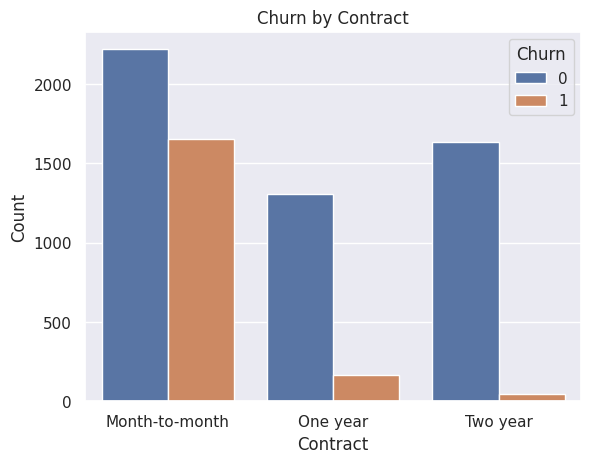

In [ ]:
# Create a stacked bar plot of Contract and Churn
sns.countplot(x='Contract', hue='Churn', data=df)

# Add title and axis labels
plt.title('Churn by Contract')
plt.xlabel('Contract')
plt.ylabel('Count')

In [ ]:
# Create a dictionary to map Contract to digits
contract_dict = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}

# Replace Contract with digits
df['Contract'] = df['Contract'].replace(contract_dict)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,No,No phone service,DSL,No,...,No,No,No,No,0,1,0,29.850,29.850,0
1,5575-GNVDE,1,0,0,0,34,Yes,No,DSL,Yes,...,Yes,No,No,No,1,0,1,56.950,"1,889.500",0
2,3668-QPYBK,1,0,0,0,2,Yes,No,DSL,Yes,...,No,No,No,No,0,1,1,53.850,108.150,1
3,7795-CFOCW,1,0,0,0,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,1,0,2,42.300,"1,840.750",0
4,9237-HQITU,0,0,0,0,2,Yes,No,Fiber optic,No,...,No,No,No,No,0,1,0,70.700,151.650,1


In [ ]:
def unique_value(df):
    for column in df:
        print(f'column: {column}\n {df[column].unique()}')

In [ ]:
unique_value(df)

column: customerID
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
column: gender
 [0 1]
column: SeniorCitizen
 [0 1]
column: Partner
 [1 0]
column: Dependents
 [0 1]
column: tenure
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
column: PhoneService
 ['No' 'Yes']
column: MultipleLines
 ['No phone service' 'No' 'Yes']
column: InternetService
 ['DSL' 'Fiber optic' 'No']
column: OnlineSecurity
 ['No' 'Yes' 'No internet service']
column: OnlineBackup
 ['Yes' 'No' 'No internet service']
column: DeviceProtection
 ['No' 'Yes' 'No internet service']
column: TechSupport
 ['No' 'Yes' 'No internet service']
column: StreamingTV
 ['No' 'Yes' 'No internet service']
column: StreamingMovies
 ['No' 'Yes' 'No internet service']
column: Contract
 [0 1 2]
column: PaperlessBilling
 [1 0]
column: Pa

<ipython-input-49-fe5a6bdfcd8f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  _=sns.heatmap(df.corr(), annot = True,color="#FF5969")


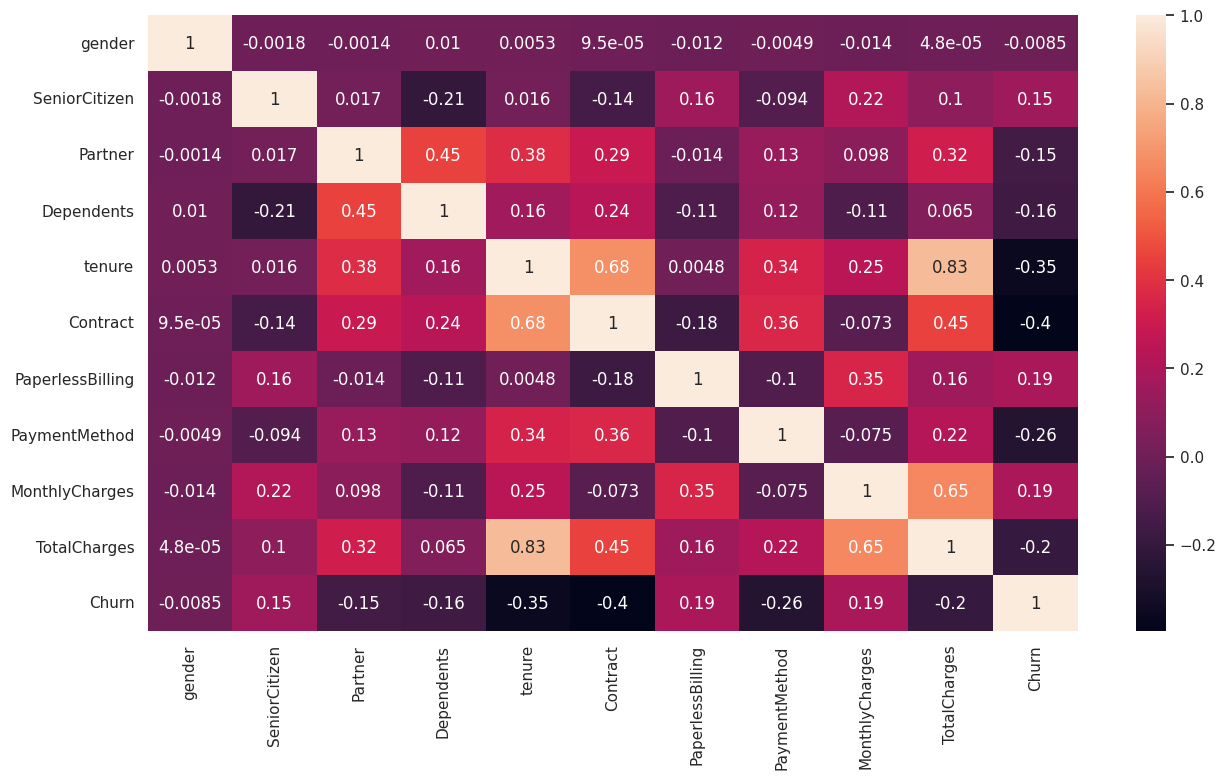

In [ ]:
plt.figure(figsize=(15,8))
_=sns.heatmap(df.corr(), annot = True,color="#FF5969")

In [ ]:
df.PhoneService.value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

#Feature Enginering




- MonthlyChargesRatio: It computes the ratio of monthly charges to the tenure plus 1.

In [ ]:
df['MonthlyChargesRatio'] = df['MonthlyCharges'] / (df['tenure'] + 1)

#Predection

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [ ]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,"7,032.000","7,032.000","7,032.000"
mean,32.422,64.798,"2,283.300"
std,24.545,30.086,"2,266.771"
min,1.000,18.250,18.800
25%,9.000,35.587,401.450
50%,29.000,70.350,"1,397.475"
75%,55.000,89.862,"3,794.738"
max,72.000,118.750,"8,684.800"


In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,0,29.850,29.850,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,1,56.950,"1,889.500",0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,1,53.850,108.150,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,2,42.300,"1,840.750",0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.700,151.650,1


method to find the correlation

In [ ]:
print(df.corr()['Churn'].sort_values(ascending = False))

Churn               1.000
MonthlyCharges      0.193
PaperlessBilling    0.191
SeniorCitizen       0.151
MultipleLines       0.038
PhoneService        0.012
gender             -0.009
StreamingTV        -0.036
StreamingMovies    -0.039
InternetService    -0.047
Partner            -0.150
Dependents         -0.163
DeviceProtection   -0.178
OnlineBackup       -0.195
TotalCharges       -0.199
PaymentMethod      -0.263
TechSupport        -0.282
OnlineSecurity     -0.289
tenure             -0.354
Contract           -0.396
Name: Churn, dtype: float64


In [ ]:
# 1- Feature Selection

X = df.drop(columns = ['Churn']) # feature variables
y = df['Churn'].values #target variable

In [ ]:
# 2- Data Splitting

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # variables for one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) # label encoding

In [ ]:
cat_cols_le

['StreamingTV',
 'SeniorCitizen',
 'OnlineSecurity',
 'Dependents',
 'OnlineBackup',
 'DeviceProtection',
 'Partner',
 'TechSupport',
 'PaperlessBilling',
 'gender',
 'MultipleLines',
 'StreamingMovies',
 'PhoneService']

In [ ]:
scaler= StandardScaler()

In [ ]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
983,1,0,0,0,1,1,2,1,0,0,0,0,0,2,0,1,0,86.600,86.600
6565,1,0,1,0,61,1,2,1,2,2,0,0,2,2,0,1,0,106.200,"6,375.200"
2212,1,0,0,0,10,1,0,2,1,1,1,1,1,1,1,0,1,19.500,225.850
2526,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,1,19.400,19.400
2751,0,0,1,1,19,0,1,0,0,0,0,0,0,0,0,1,1,24.850,434.800


In [ ]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5710,0,0,1,0,70,1,2,1,0,2,2,2,2,2,2,1,0,110.500,"7,752.050"
2513,1,0,1,1,52,1,0,2,1,1,1,1,1,1,2,0,1,19.200,"1,054.750"
1078,0,1,0,0,59,1,2,1,0,2,0,0,0,0,2,1,3,79.200,"4,590.350"
5711,0,1,1,0,20,1,2,1,0,0,2,0,2,0,0,0,0,90.800,"1,951.000"
6574,0,1,0,0,9,1,2,1,0,0,2,0,2,0,0,1,0,90.100,816.800


In [ ]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)


In [ ]:
# trainting Data
model_rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', max_leaf_nodes=30, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=50)

In [ ]:
# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8104265402843602


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1549
           1       0.70      0.49      0.58       561

    accuracy                           0.81      2110
   macro avg       0.77      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8123222748815165


In [ ]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1549
           1       0.67      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.81      0.81      0.81      2110



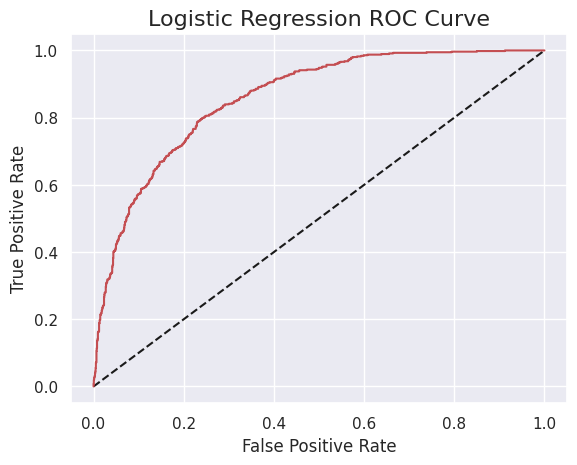

In [ ]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();